In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

In [124]:
data=pd.read_csv("Task 3 and 4_Loan_Data.csv")

In [126]:
print(data.isnull().sum())

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64


In [128]:
print(data.describe())

        customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  1.000000e+04              10000.000000          10000.000000   
mean   4.974577e+06                  1.461200           4159.677034   
std    2.293890e+06                  1.743846           1421.399078   
min    1.000324e+06                  0.000000             46.783973   
25%    2.977661e+06                  0.000000           3154.235371   
50%    4.989502e+06                  1.000000           4052.377228   
75%    6.967210e+06                  2.000000           5052.898103   
max    8.999789e+06                  5.000000          10750.677810   

       total_debt_outstanding         income  years_employed    fico_score  \
count            10000.000000   10000.000000    10000.000000  10000.000000   
mean              8718.916797   70039.901401        4.552800    637.557700   
std               6627.164762   20072.214143        1.566862     60.657906   
min                 31.652732    1000.000000    

In [130]:
X = data.drop(['customer_id', 'default'], axis=1)
y = data['default']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [134]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [136]:
accuracy= accuracy_score(y_test,y_pred)
print("accuracy is: ",accuracy,"\n")
print("Classification Report:\n")
report=classification_report(y_test,y_pred)
print(report)
ra =  roc_auc_score(y_test,y_prob)
print("ROC_AUC_SCORE :\n",ra)

accuracy is:  0.996 

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      0.99      0.99       370

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

ROC_AUC_SCORE :
 0.9998598905654121


In [221]:
from sklearn import tree
import matplotlib.pyplot as plt

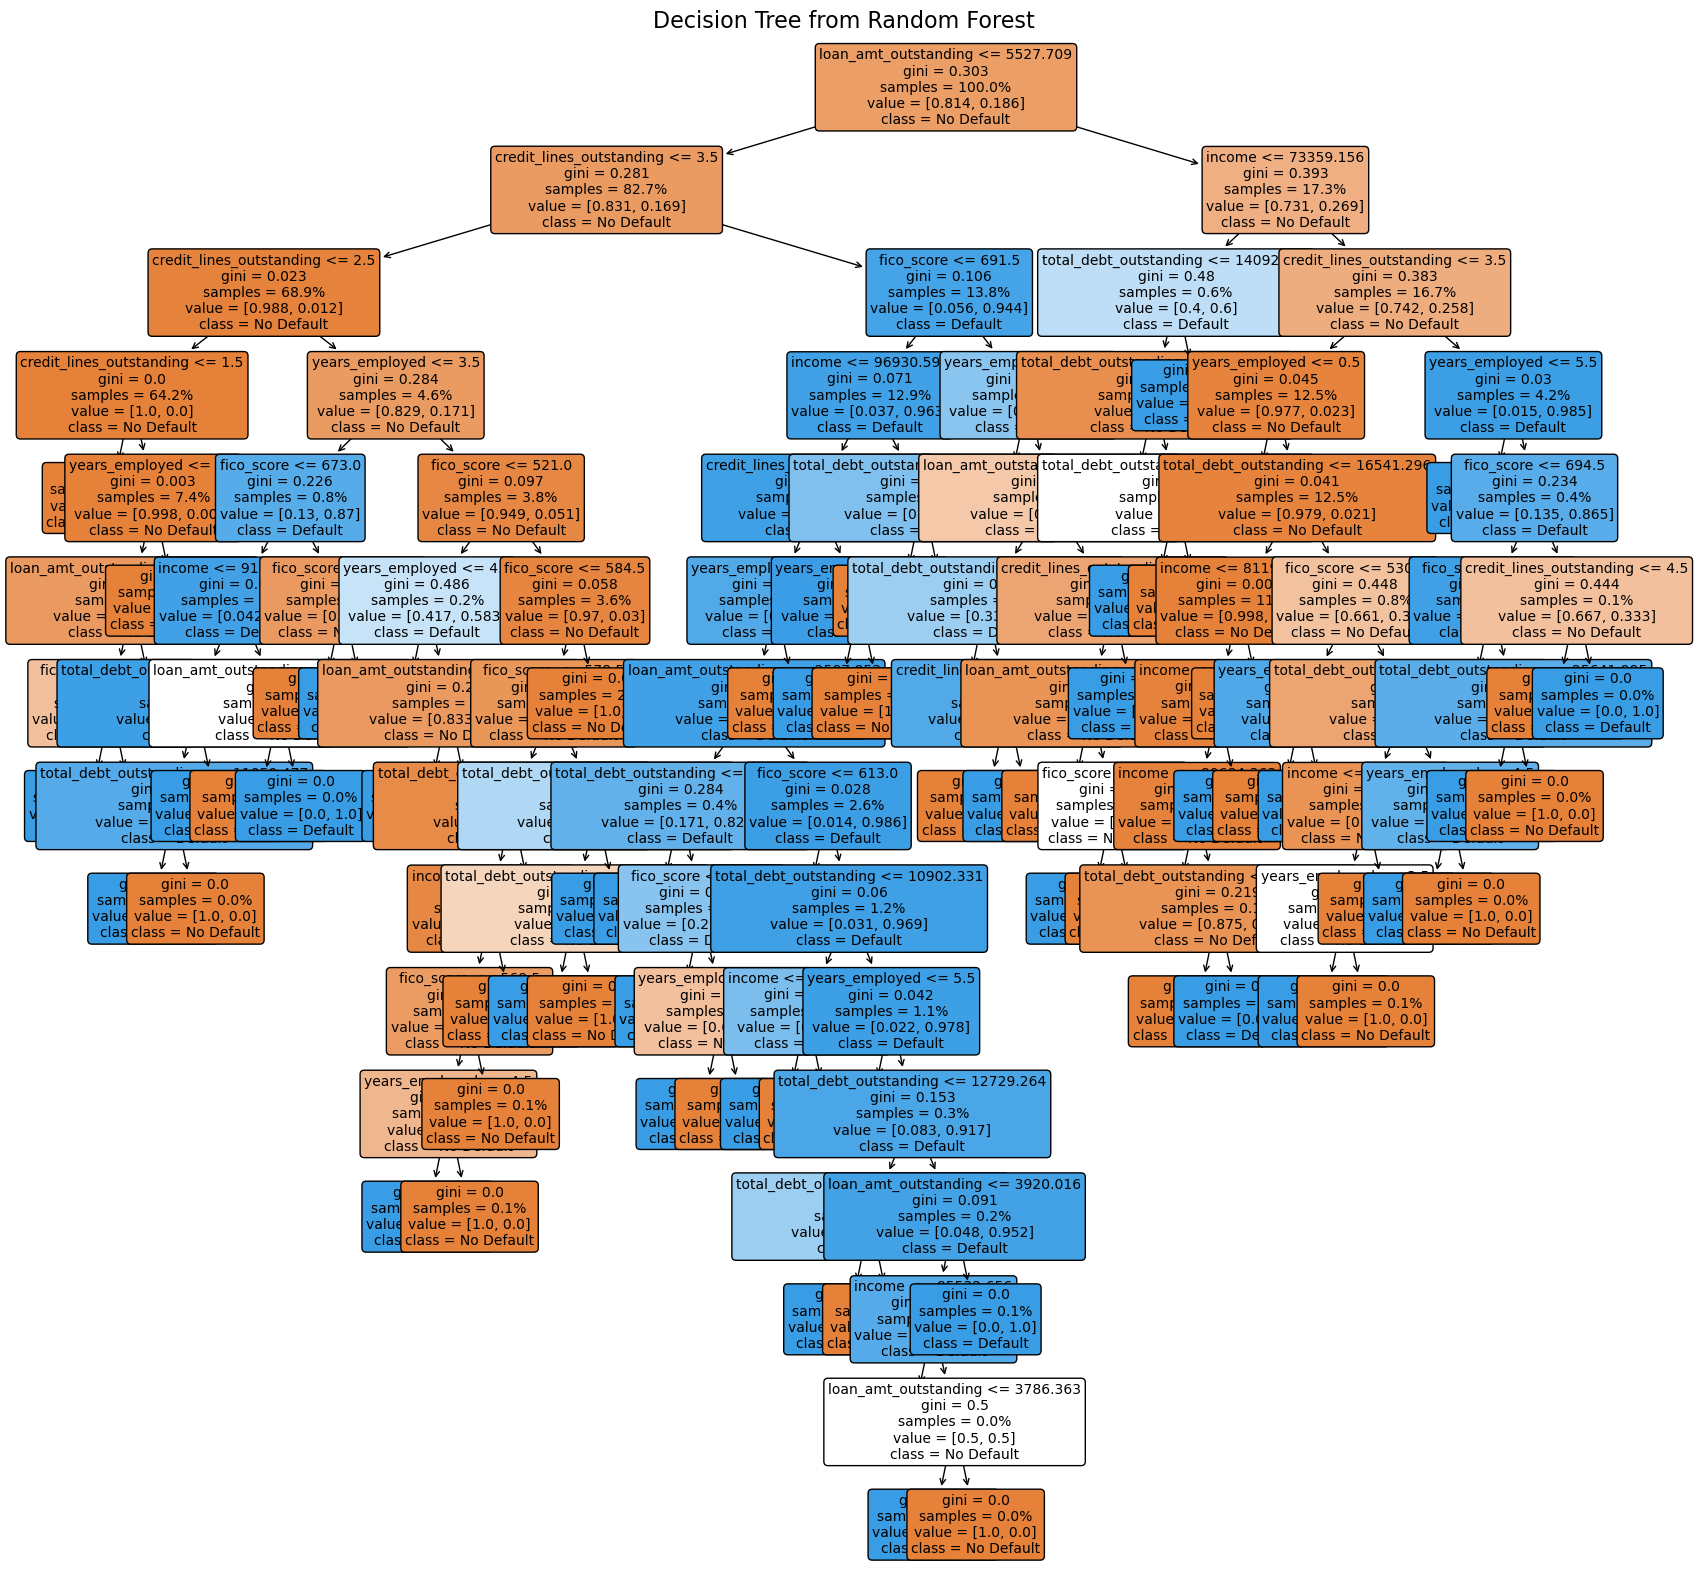

In [227]:
plt.figure(figsize=(20,20))
tree.plot_tree(model.estimators_[0], 
               feature_names=X.columns,
               class_names=['No Default', 'Default'],
               filled=True, rounded=True,
               proportion=True,
               fontsize=10)
plt.title("Decision Tree from Random Forest", fontsize=16)
plt.show()

In [229]:
def calc_expected_loss(loan_features, model=model, recovery_rate=0.1):
    features_df = loan_features  
    expected_columns = ['credit_lines_outstanding', 'loan_amt_outstanding', 
                        'total_debt_outstanding', 'income', 'years_employed', 'fico_score']
    features_df = features_df[expected_columns]
    
    pd = model.predict_proba(features_df)[0, 1]
    print("probablilty of default: ",pd)
    exposure_at_default = loan_features['loan_amt_outstanding']
    loss_given_default = exposure_at_default * (1 - recovery_rate)
    
    expected_loss = pd * loss_given_default
    print("Expected Loss of the sample loan: ",expected_loss[0])    
    return expected_loss, pd

In [231]:
sample = {
    'credit_lines_outstanding': 2,
    'loan_amt_outstanding': 5000,
    'total_debt_outstanding': 15000,
    'income': 60000,
    'years_employed': 5,
    'fico_score': 650
}
sample_df = pd.DataFrame([sample])



In [233]:
calc_expected_loss(sample_df)

probablilty of default:  0.18
Expected Loss of the sample loan:  810.0


(0    810.0
 Name: loan_amt_outstanding, dtype: float64,
 0.18)